## Modelo para la detección de caras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun May 11 22:22:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip list | grep torch

torch                                 2.6.0+cu124
torchaudio                            2.6.0+cu124
torchsummary                          1.5.1
torchvision                           0.21.0+cu124


In [ ]:
%pip install ultralytics roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


### Entrenamiento de YOLOv11 para el dataset de entrenamiento

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=parameters_YOLOv5.yaml epochs=50 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 161MB/s]
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=parameters_YOLOv5.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1600.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch1601.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch1602.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch1.jpg     weights


## Resultados


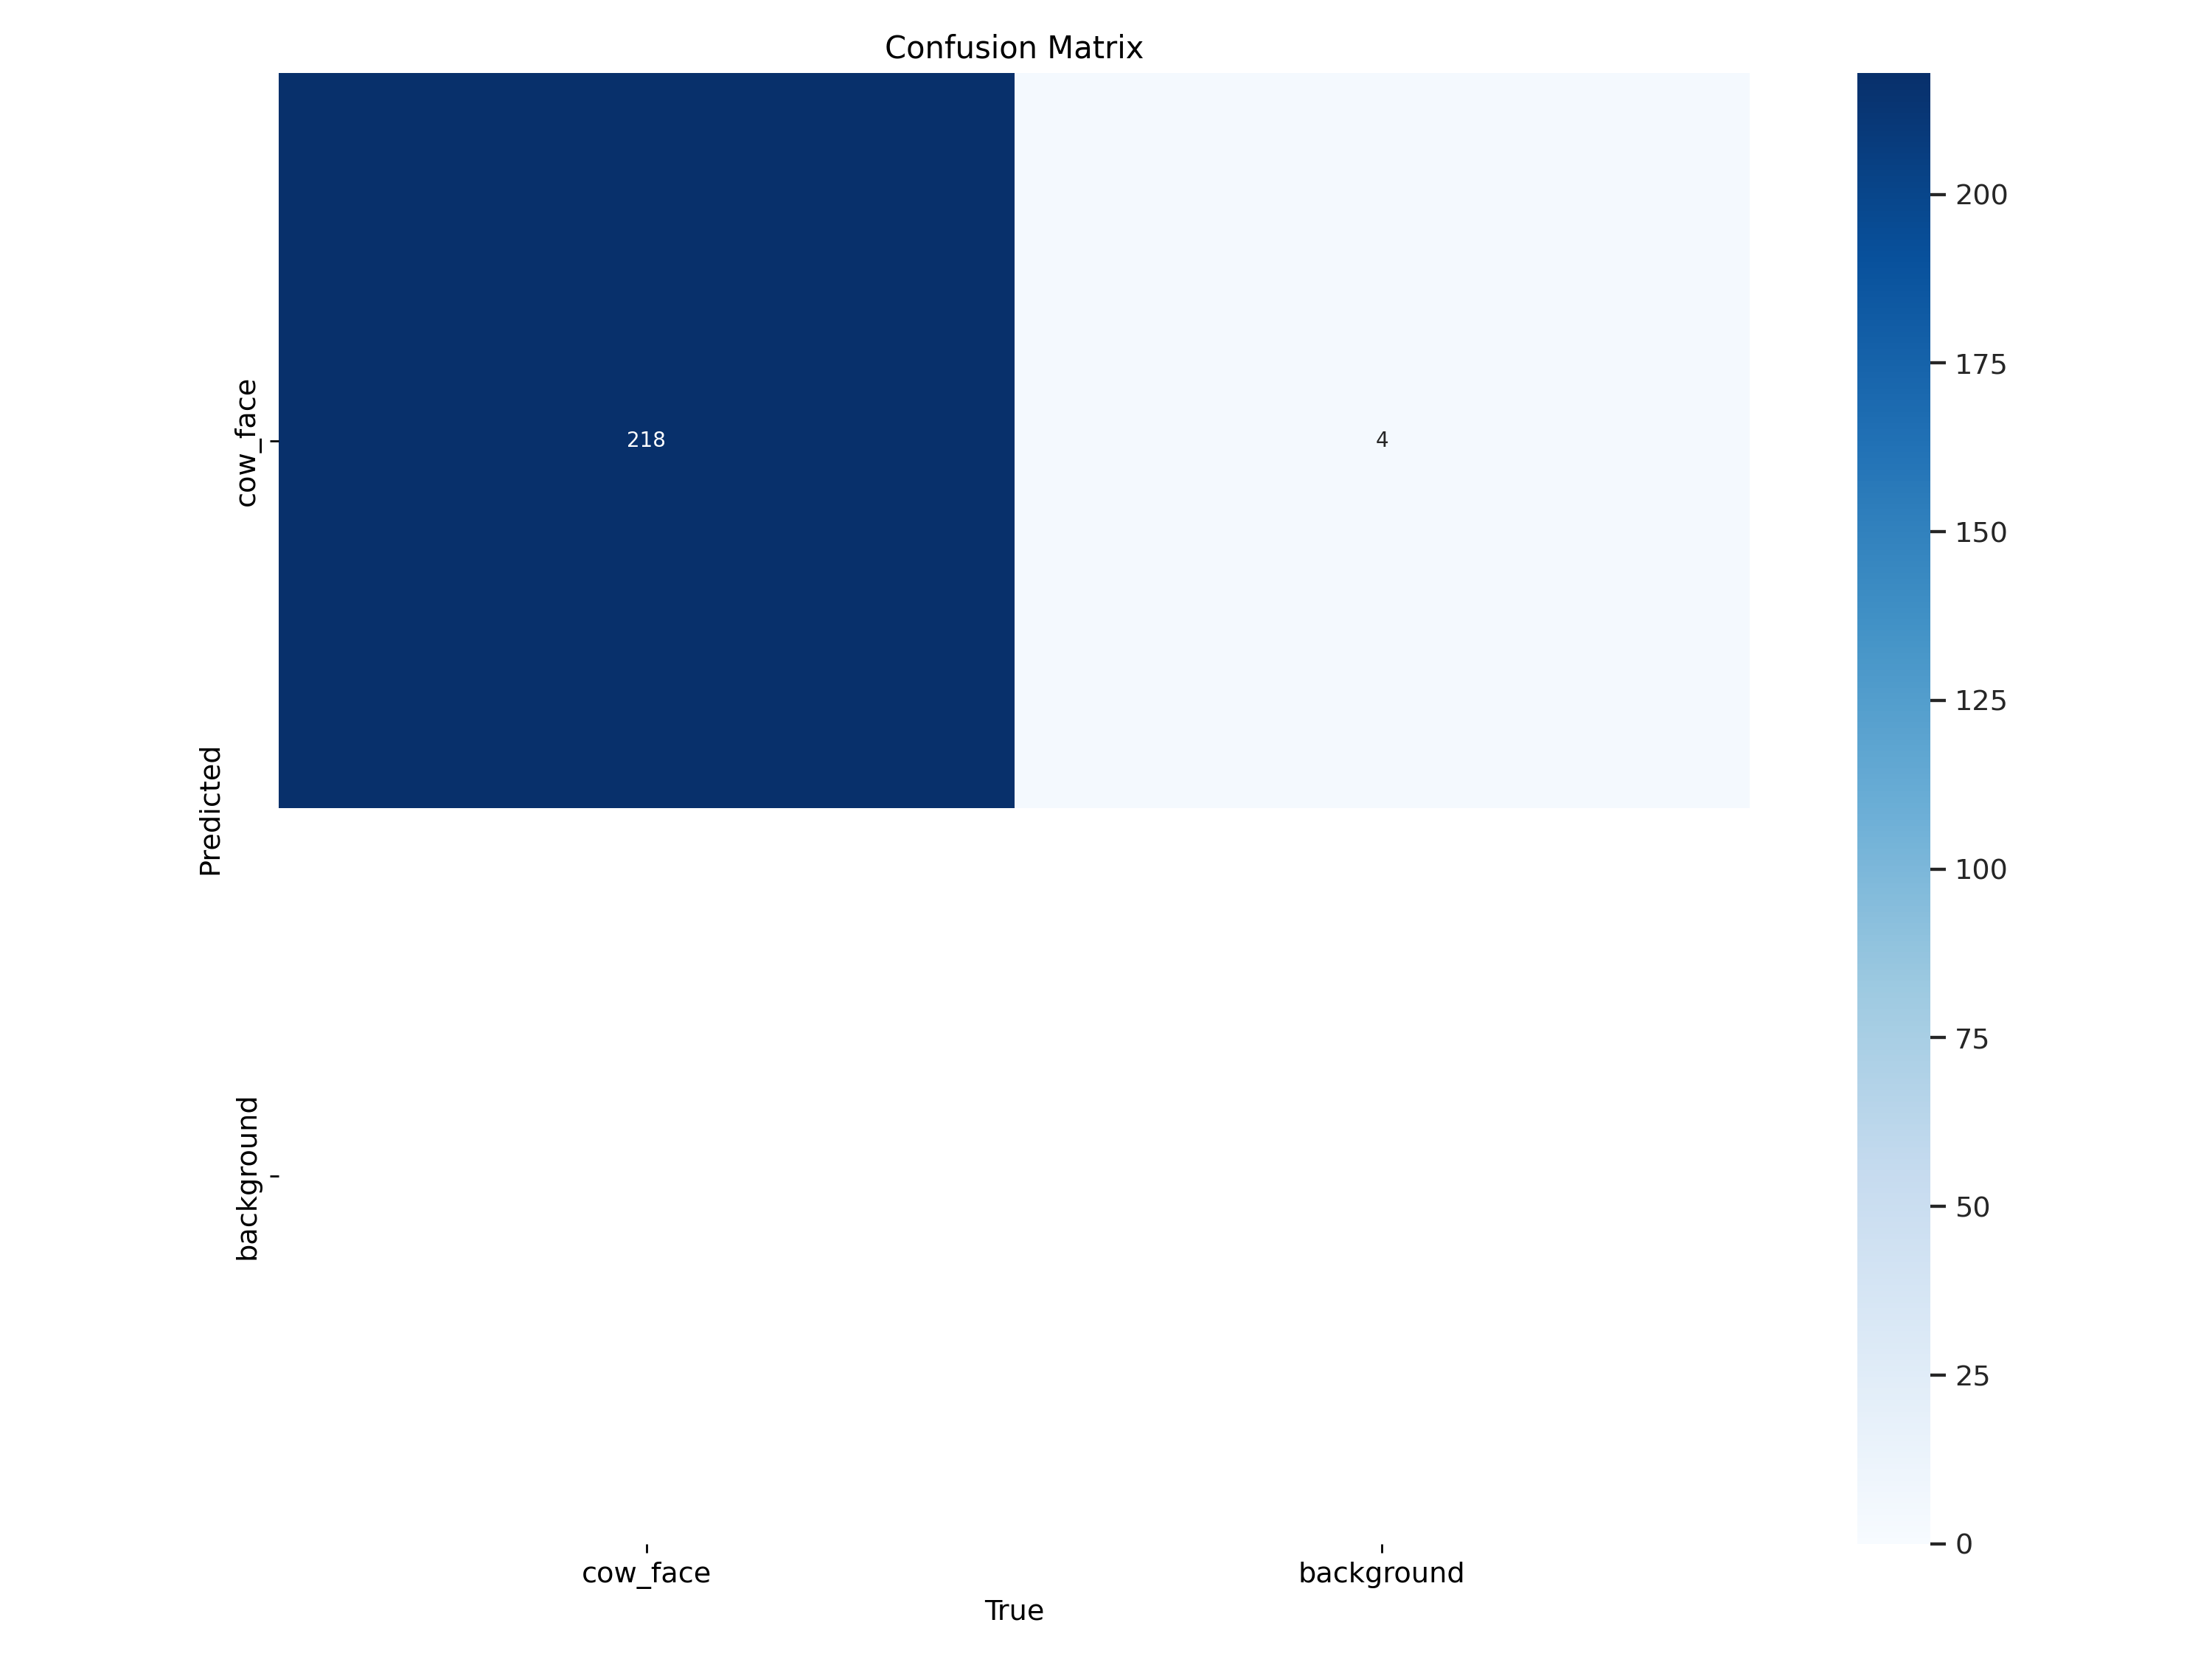

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

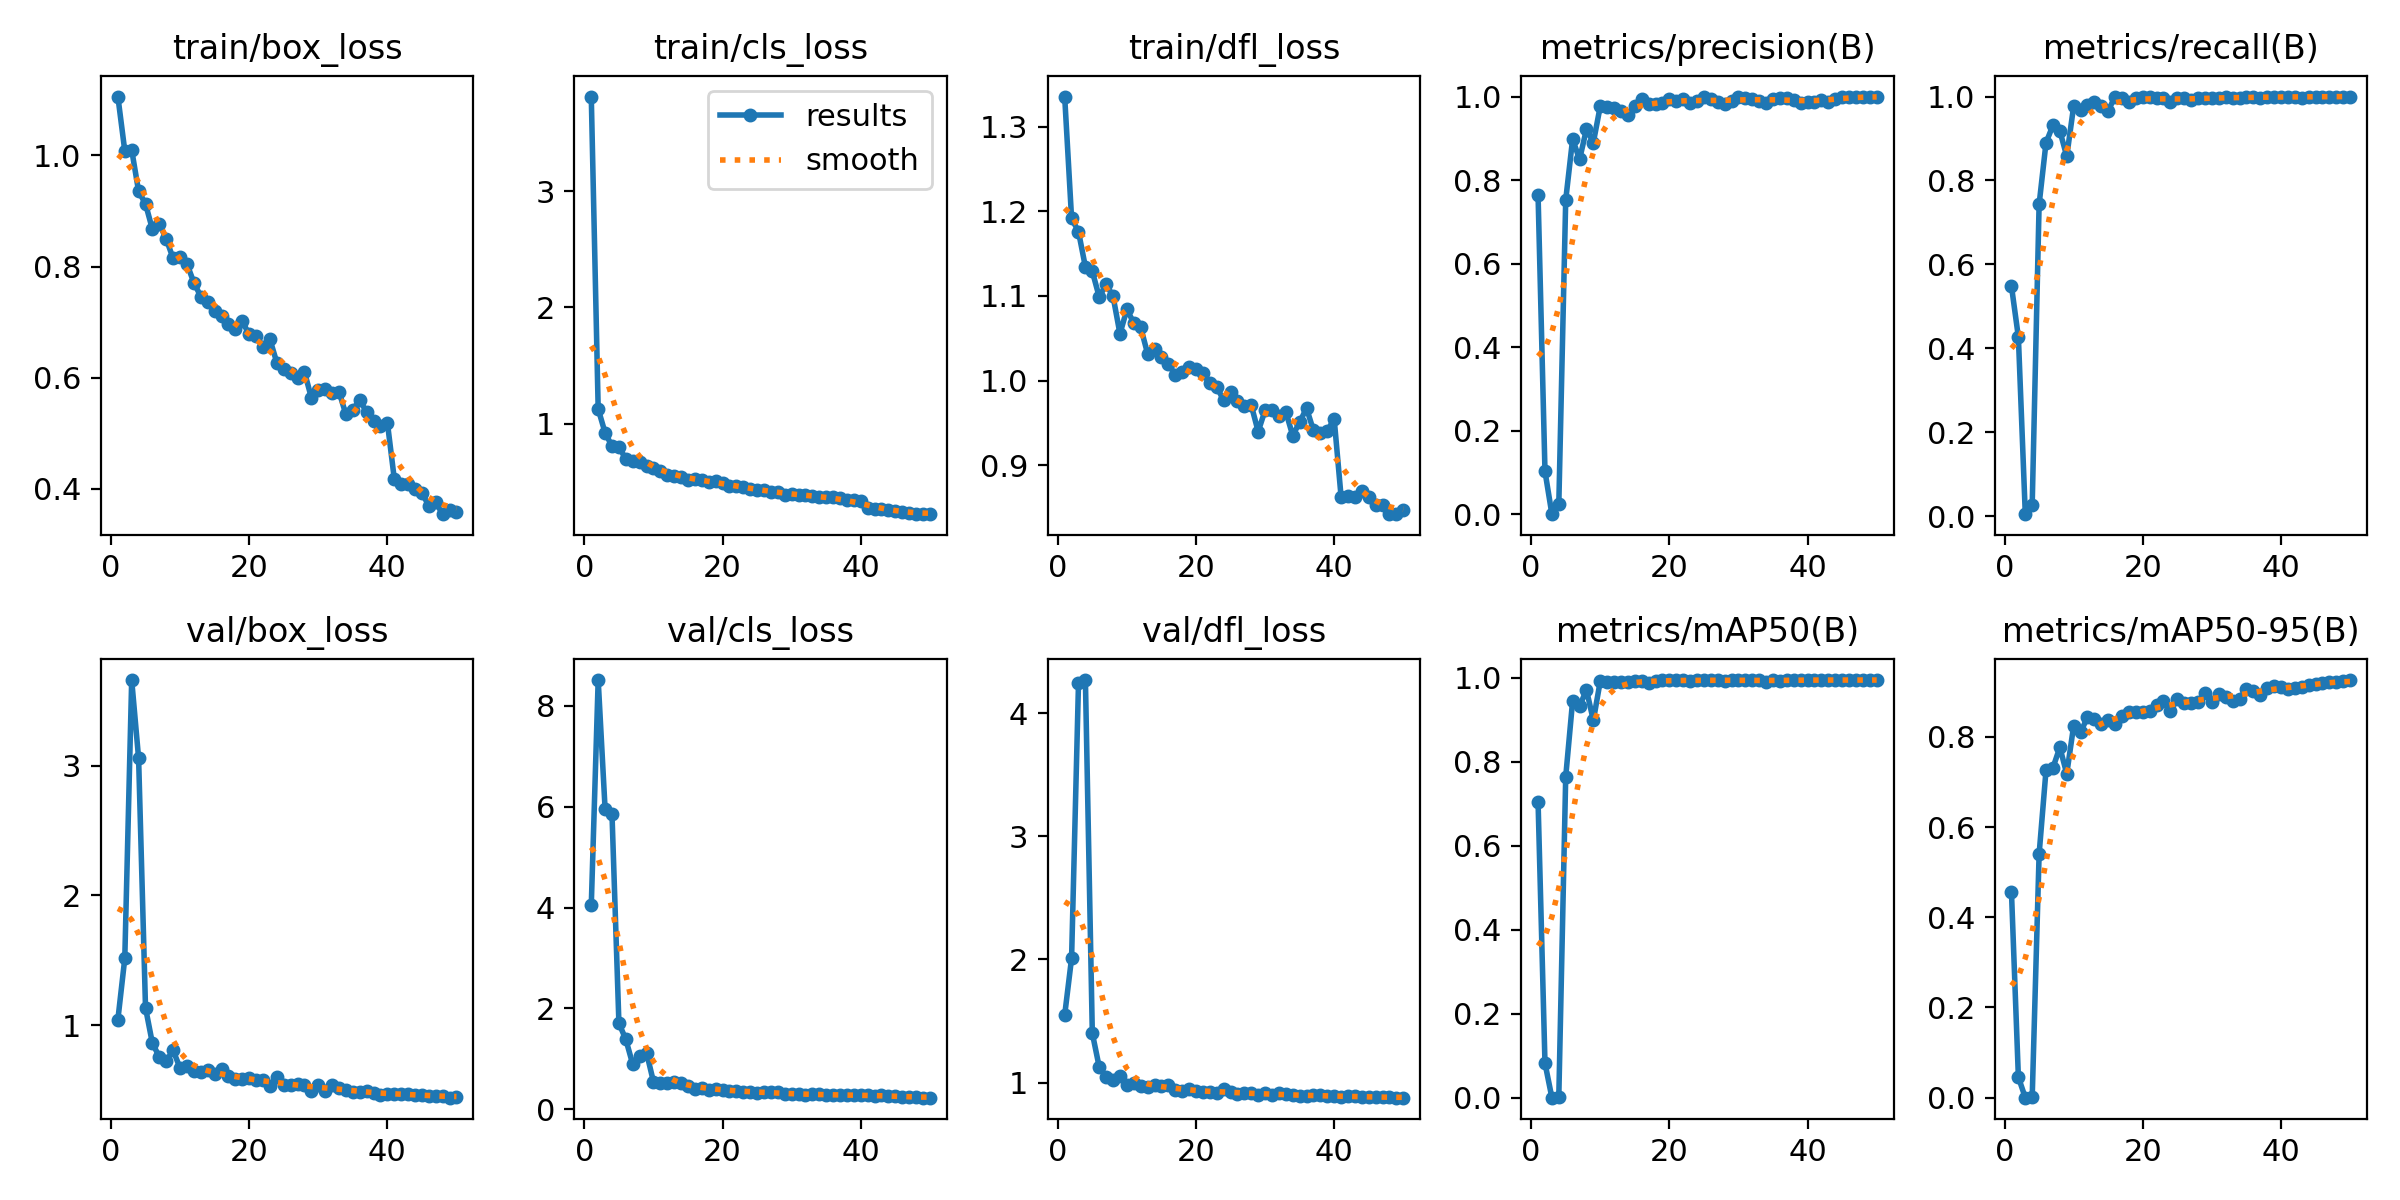

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

### Identificación caras primer batch

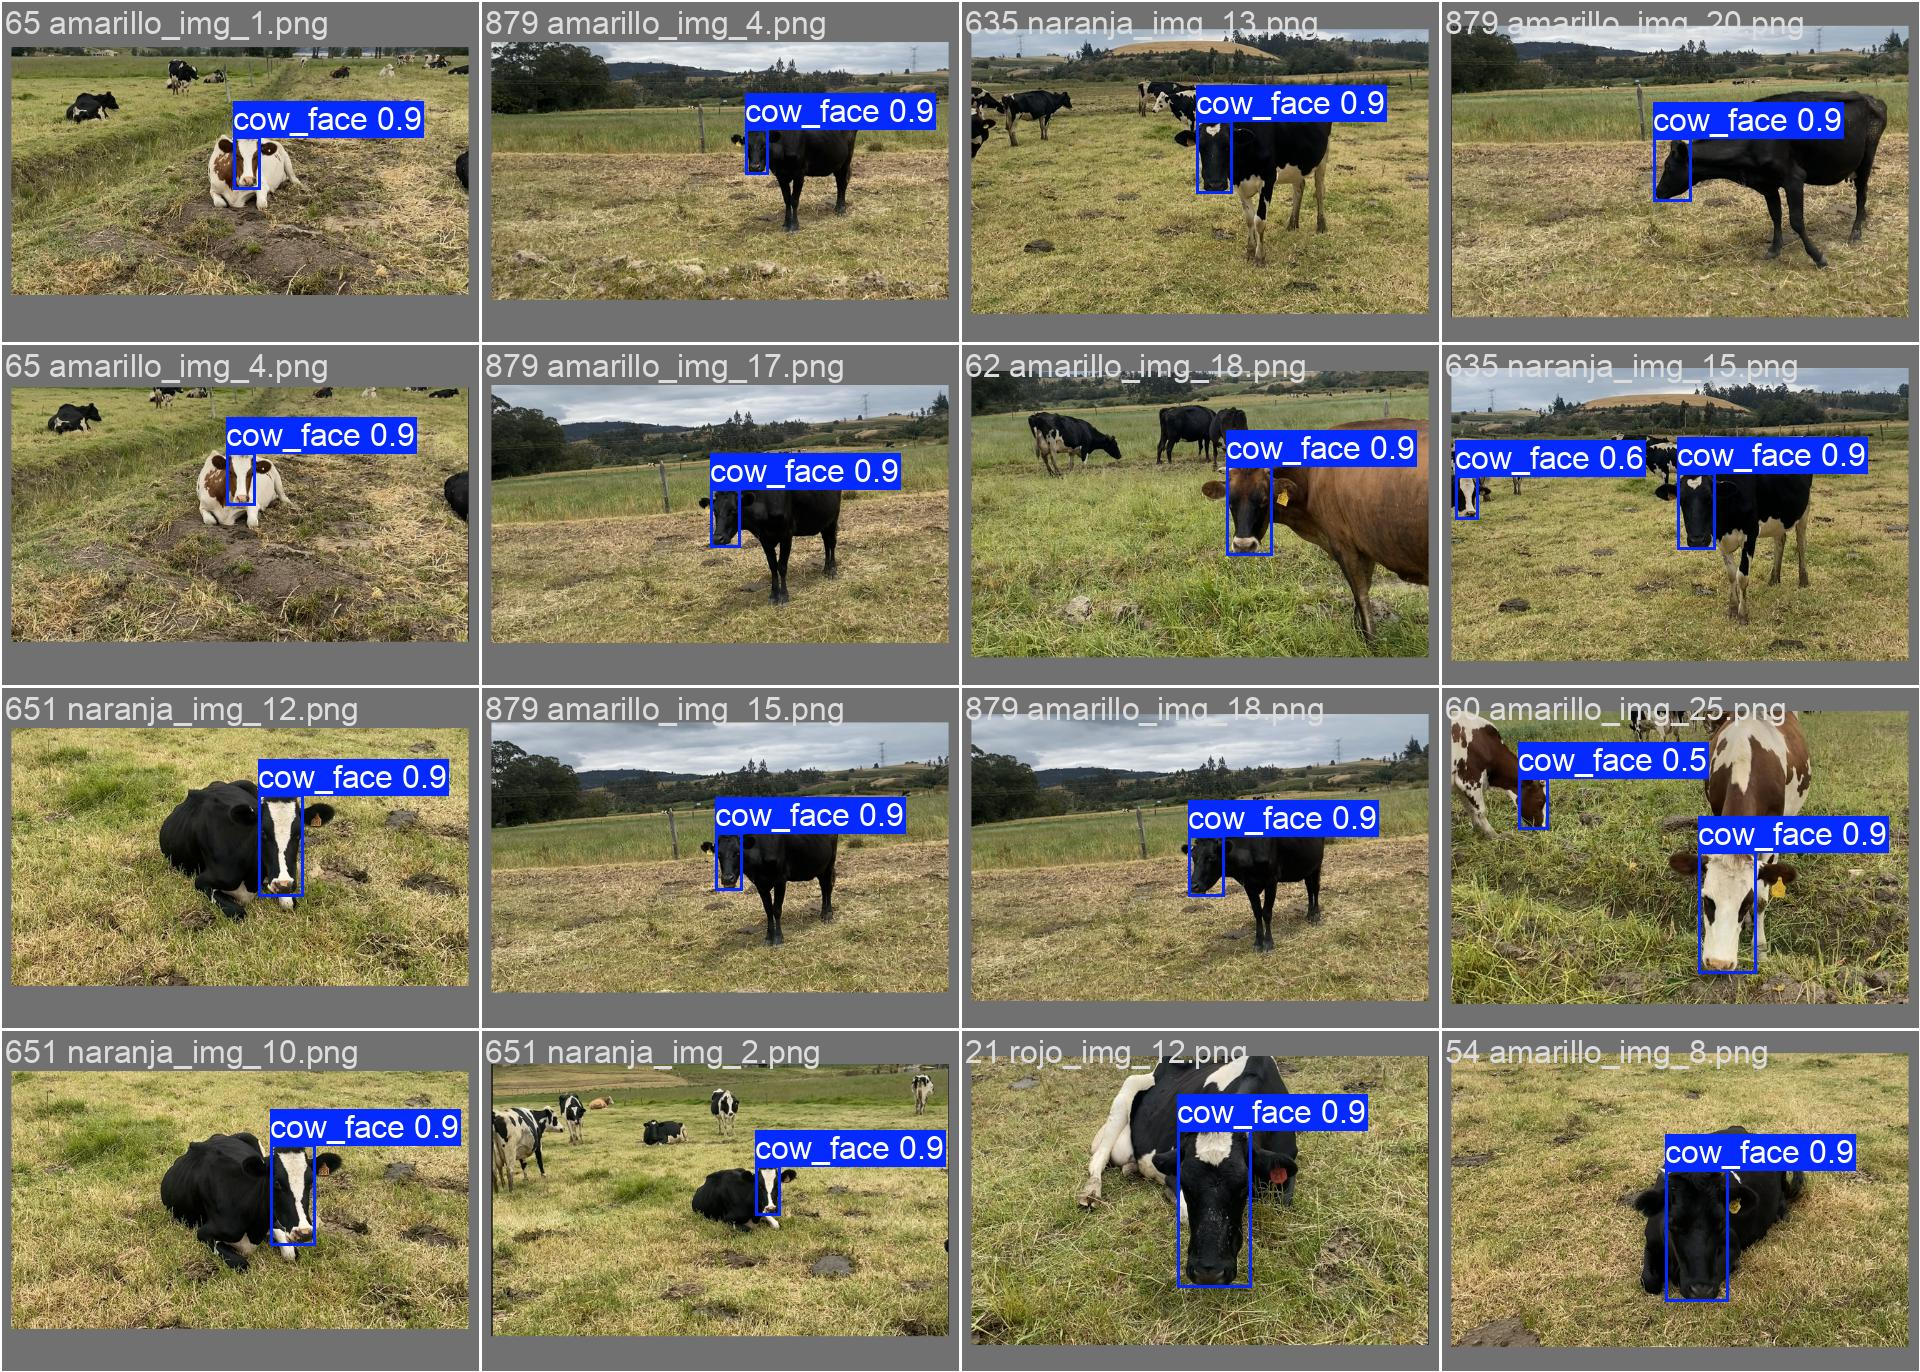

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validación

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=parameters_YOLOv5.yaml

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
WARNING ⚠️ val: Slow image access detected (ping: 34.1±75.3 ms, read: 109.5±93.6 MB/s, size: 641.7 KB). Use local storage instead of remote/mounted storage for better performance. See https://docs.ultralytics.com/guides/model-training-tips/
val: Scanning /content/drive/MyDrive/Vision/Proyecto/partitioned_data/val/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100% 218/218 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:05<00:00,  2.62it/s]
                   all        218        218          1          1      0.995      0.926
Speed: 0.9ms preprocess, 11.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Resultados con imagenes para test

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images save=True

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_17.png: 480x640 1 cow_face, 47.4ms
image 2/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_21.png: 608x640 1 cow_face, 61.4ms
image 3/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_27.png: 512x640 1 cow_face, 80.8ms
image 4/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_31.png: 512x640 1 cow_face, 12.6ms
image 5/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_34.png: 544x640 1 cow_face, 80.4ms
image 6/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/test/images/02 rojo_img_42.png: 640x640 1 cow_face, 17.2ms
image 7/231 /content/drive/MyDrive/Vision/Proyecto/partitioned_data/te

### Resultados para 3 vacas

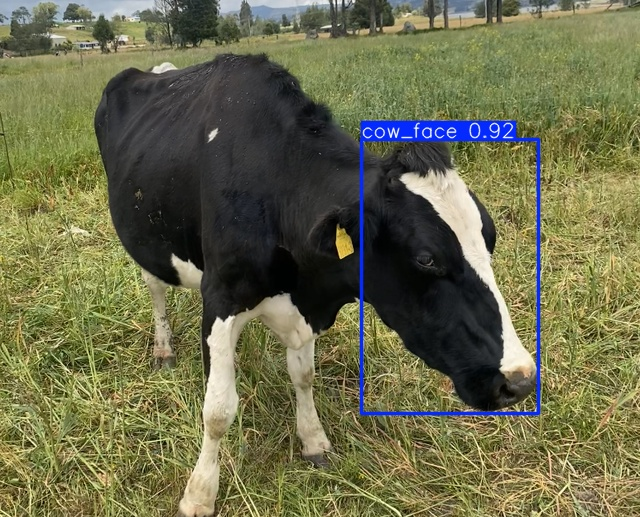

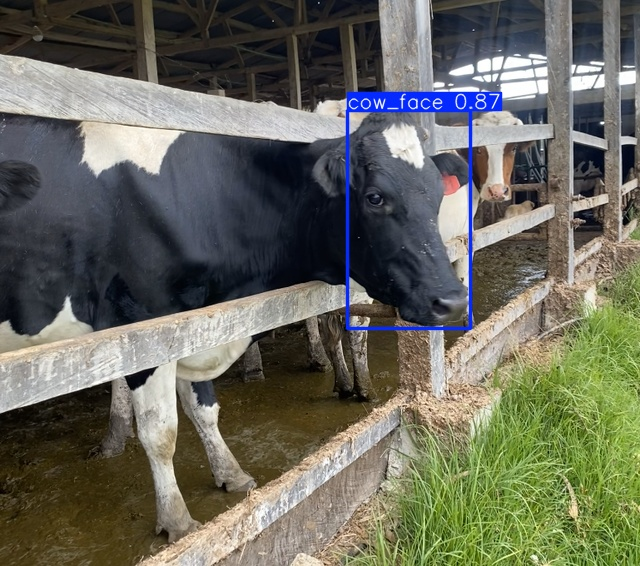

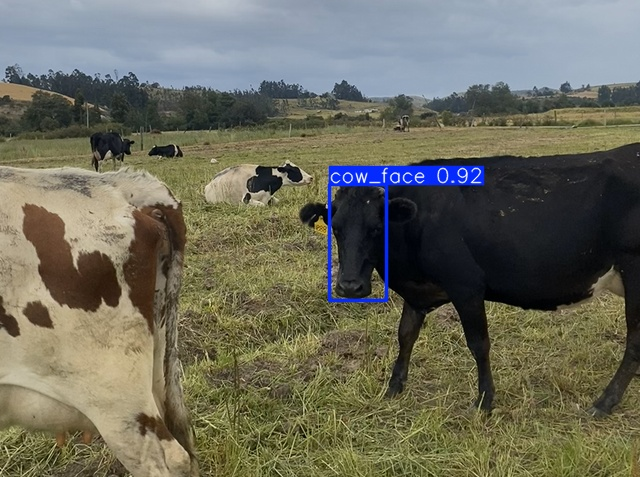

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Exportación del modelo

In [ ]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=engine

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.52...
ONNX: export success ✅ 2.2s, saved as '/content/runs/detect/train/weights/best.onnx' (36.2 MB)

TensorRT: starting export with TensorRT 10.10.0.31...
[05/11/2025-23:18:23] [TRT] [I] [MemUsageChange] Init CUDA: CPU -2, GPU +0, now: CPU 913, GPU 326 (MiB)
[05/11/2025-23:18:24] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +715, GPU +2, now: CPU 1621, GPU 328 (MiB)
[05/11/2025-23:18:24] [TRT] [I] ----------------------------------------------------------------
[05/11/2025-23:18:24] [TRT] [I] Input fil

## Prueba del mejor modelo

Se carga el mejor modelo best.pt luego de ser exportado y se prueba con una imagen fuera del dataset de entrenamiento.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
from ultralytics import YOLO

model_11 = YOLO("best.pt")

def get_yolo_coordinates(path, model):

  results = model(path, save_txt=False, save=False, imgsz=640, conf=0.5)
  vals = results[0].boxes.xywh
  vals = vals.cpu()
  x_center, y_center, width, height = vals.numpy().flatten()

  return x_center, y_center, width, height

x_center, y_center, width, height = get_yolo_coordinates('prueba.jpg', model_11)
x_center, y_center, width, height


image 1/1 /content/prueba.jpg: 448x640 1 cow_face, 12.9ms
Speed: 3.2ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


(np.float32(363.48608),
 np.float32(238.6576),
 np.float32(116.205475),
 np.float32(167.32106))

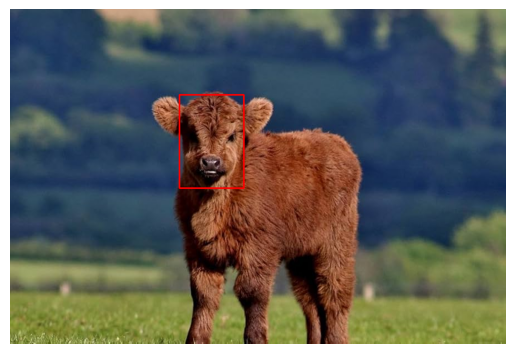

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('prueba.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x_min = int(x_center - width / 2)
y_min = int(y_center - height / 2)
x_max = int(x_center + width / 2)
y_max = int(y_center + height / 2)

cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()